In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Fase 1: Exploración y Limpieza
## Exploración Inicial:
1) Realiza una exploración inicial de los datos para identificar posibles problemas, como valores
nulos, atípicos o datos faltantes en las columnas relevantes.
2) Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la
presencia de valores nulos y estadísticas básicas de las columnas involucradas.
3) Une los dos conjuntos de datos de la forma más eficiente.


Analizo los datos del primer dataframe Customer Flight Activity

In [2]:
df_f_act = pd.read_csv("C:/Users/Usuario/Documents/Adalab49/Módulo 3/bda-modulo-3-evaluacion-final-Maleni86/Customer Flight Activity.csv")
df_f_act.head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0
6,100364,2017,1,0,0,0,0,0.0,0,0
7,100380,2017,1,0,0,0,0,0.0,0,0
8,100428,2017,1,6,0,6,606,60.0,0,0
9,100504,2017,1,0,0,0,0,0.0,0,0


In [3]:
# Analizo la información de las columnas, una por una, si presentan datos atípicos, negativos, nulos y/o duplicados.

In [4]:
df_f_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [5]:
df_f_act.shape

(405624, 10)

In [6]:
df_f_act.nunique() #Aqui reviso cuantos valores únicos por columnas hay

Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

Aqui exploro si tiene valores nulos y veo que no tiene ningún valor nulo

In [7]:
df_f_act.isna().sum()/df_f_act.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

Aqui encontramos que hay 1864 duplicados, por ello vamos a identificar donde se encuentran y veremos como tratarlos:

In [8]:
df_f_act.duplicated().sum() # cuenta las filas que están duplicadas en mi dataframe

1864

In [9]:
df_f_act_duplicados = df_f_act[df_f_act.duplicated(keep=False)] #Aquí analizo cuales son las filas duplicadas y las reviso con sus filas originales

df_f_act_duplicados.head(20)  #Analizando los datos decido eliminar las filas duplicadas, ya que no me aportan ningún valor.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
566,130331,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
659,135421,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0


In [10]:
df_f_act_limpio = df_f_act.drop_duplicates() #Elimino las filas duplicadas, en una variable diferente y compruebe que ya no hayan duplicados.


In [11]:
df_f_act_limpio.head(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0
6,100364,2017,1,0,0,0,0,0.0,0,0
7,100380,2017,1,0,0,0,0,0.0,0,0
8,100428,2017,1,6,0,6,606,60.0,0,0
9,100504,2017,1,0,0,0,0,0.0,0,0


In [12]:
df_f_act_limpio.duplicated().sum() # Verifico que ya no existen filas duplicadas

0

In [13]:
df_f_act_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 33.9 MB


Aqui analizo los datos estadisticos de todas las columnas numéricas

In [14]:
df_f_act.describe().T 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Ahora analizo los datos del segundo dataframe Customer Loyalty History

In [15]:
df_l_hist = pd.read_csv("C:/Users/Usuario/Documents/Adalab49/Módulo 3/bda-modulo-3-evaluacion-final-Maleni86/Customer Loyalty History.csv")

df_l_hist.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [16]:
df_l_hist.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [17]:
df_l_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [18]:
df_l_hist.shape

(16737, 16)

In [19]:
df_l_hist.nunique() #Aqui reviso cuantos valores únicos por columnas hay

Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

In [20]:
df_l_hist.describe(include="O").T #Aqui voy a explorar los datos estadisticos de mi dataframe

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [21]:
df_l_hist.duplicated().sum() # Aquí reviso si hay filas que están duplicadas en mi dataframe, y veo que no hay duplicados.

0

In [22]:
df_l_hist.isnull().sum() # Ahora analizo si hay nulos, en recuento y en porcenteja por columna

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [23]:
df_l_hist.isna().sum()/df_l_hist.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

#### Analizando primero los datos nulos de la columnas Salary

In [24]:
df_subset = df_l_hist[['Education', 'Salary']] # Observamos que tiene relación con la columna education ya que todos los que tienen categoría College aparecen con el salario NaN (nulo)

In [25]:
df_subset.sample(10)

,Education,Salary
12394,College,NaN
4624,College,NaN
9871,College,NaN
7149,Bachelor,47288.0
8540,Bachelor,73185.0
7701,College,NaN
9551,Bachelor,79072.0
3258,Bachelor,65489.0
1503,Bachelor,101310.0
1037,Bachelor,83456.0


Como el salario de College debería estar entre el salario de High Schooll or Below y de Bachelor, calculamos la mediana de ambas columnas para reemplazar los valores nulos del salario de College por dicho resultado.

In [26]:
mediana_high_bachelor = df_l_hist[df_l_hist['Education'].isin(['High Schooll or Below', 'Bachelor'])]['Salary'].median()
mediana_high_bachelor # Calculamos la mediana entre ambas columnas y vemos que es muy similar a la media (72451) pero al ser más robusta elijo la mediana.

71960.0

In [27]:
df_l_hist["Salary"].fillna(mediana_high_bachelor, inplace=True) #Reemplazamos los datos nulos de Salary por la mediana.

In [28]:
df_l_hist.isna().sum()/df_l_hist.shape[0]*100 #Ahora ya no tenemos valores nulos en Salary

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                 0.000000
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

### Ahora analizamos las siguientes dos columnas que presentan nulos: Cancellation Year y Cancellation Month

In [29]:
df_Cancellation = df_l_hist[["Cancellation Year","Cancellation Month"]] 
#Observamos que tienen los valores nulos en las mismas filas, y por el signicado de cada una (cancelación de la membresía AÑO/MES)
# Concluyo que los nulos son los clientes que aún tienen su membresía Activa.

df_Cancellation.sample(10)

,Cancellation Year,Cancellation Month
14025,NaN,NaN
12868,NaN,NaN
2477,2014.0,2.0
2984,NaN,NaN
3319,2017.0,1.0
2787,NaN,NaN
9520,NaN,NaN
9223,NaN,NaN
14159,NaN,NaN
7248,NaN,NaN


In [30]:
# Después de este análisis decido convertir las columnas de "Cancellation Month" y "Cancellation Year" en una columna adicional al final llamada "Status":
def status(df, columnas):
    for col in columnas:
        df[f"Status"] = df[col].apply(lambda x: "inactivo" if x == x else "activo") 
    return df

In [31]:
df_l_hist_limpio = status(df_l_hist, ['Cancellation Month'])
df_l_hist_limpio.sample(10) 
# Aquí el output muestra que en los espacios de las columnas "Cancellation Month y Year" los NaN se han cambiado por activo (ya que siguen con la membresía) y los Inactivos es porque se dieron de baja en ese año y/o mes.

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Status
12292,108367,Canada,Ontario,Toronto,M8Y 4K8,Female,Bachelor,54794.0,Married,Star,3528.04,Standard,2017,5,2018.0,1.0,inactivo
12952,540918,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,76153.0,Married,Star,4666.64,Standard,2015,9,NaN,NaN,activo
16008,995734,Canada,Yukon,Whitehorse,Y2K 6R0,Female,College,71960.0,Single,Star,13727.80,Standard,2014,12,NaN,NaN,activo
12926,615673,Canada,British Columbia,Vancouver,V1E 4R6,Male,Master,123828.0,Married,Star,4636.55,Standard,2015,8,NaN,NaN,activo
9121,398846,Canada,Manitoba,Winnipeg,R2C 0M5,Female,College,71960.0,Single,Nova,13727.80,Standard,2017,8,NaN,NaN,activo
9550,481590,Canada,Ontario,Toronto,M2P 4F6,Male,Bachelor,79072.0,Married,Nova,21639.84,Standard,2018,6,NaN,NaN,activo
15549,801483,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,66443.0,Married,Star,9805.83,Standard,2016,12,NaN,NaN,activo
12040,362586,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,89419.0,Divorced,Star,2949.28,Standard,2013,4,NaN,NaN,activo
6204,936547,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,56741.0,Single,Nova,4898.67,Standard,2014,2,NaN,NaN,activo
16131,776399,Canada,Manitoba,Winnipeg,R2C 0M5,Female,High School or Below,78318.0,Married,Star,15114.40,Standard,2018,12,NaN,NaN,activo


### Hacemos una ultima exploración para verificar como quedan mis columnas en mi nuevo df

In [32]:
df_l_hist_limpio.isna().sum()/df_l_hist.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                 0.000000
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
Status                 0.000000
dtype: float64

In [33]:
df_l_hist_limpio.describe(include="O").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766
Status,16737,2,activo,14670


## Finalmente unimos los dos dataframe en uno solo 

In [34]:
df_unido = df_l_hist_limpio.merge(df_f_act_limpio, on=["Loyalty Number"], how="left")


In [35]:
df_unido.head(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Status,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2018,10,6,2,8,3352,335.0,465,38
5,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,5,13,4,17,3757,375.0,0,0
6,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,6,12,0,12,1320,132.0,0,0
7,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,7,8,0,8,1448,144.0,0,0
8,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,8,14,6,20,2180,218.0,0,0
9,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,activo,2017,9,2,2,4,1200,120.0,0,0


In [36]:
df_unido.shape

(403760, 26)

In [37]:
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       403760 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

In [38]:
df_unido.to_csv("df_final.csv")

# Fase 2: Visualización

1) ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Text(0, 0.5, 'Total de Vuelos Reservados')

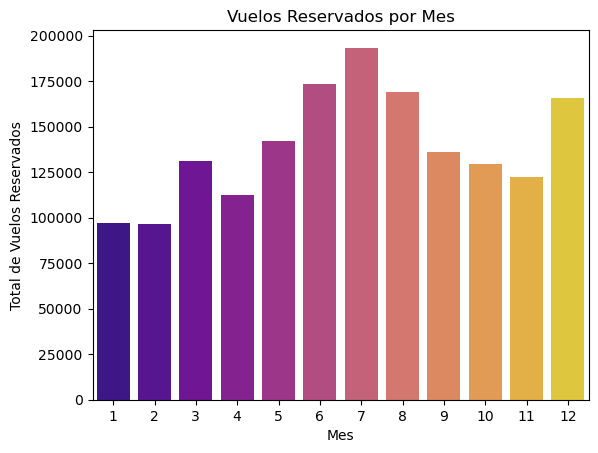

In [39]:
reservas_vuelos_mensual = df_unido.groupby('Month')['Flights Booked'].sum().reset_index()
sns.barplot(x='Month', y='Flights Booked', data=reservas_vuelos_mensual, palette='plasma')
plt.title('Vuelos Reservados por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Vuelos Reservados')


Explicación: En esta grafica observamos que los meses en los que se reservan más vuelos son en primer lugar: Junio, Julio y Agosto por ser temporada alta (verano) en Canadá y en el mes de Diciembre por ser la segunda temporada alta por fiestas navideñas, a estos los podemos llamar patrones por estacionalidad.

2) ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?


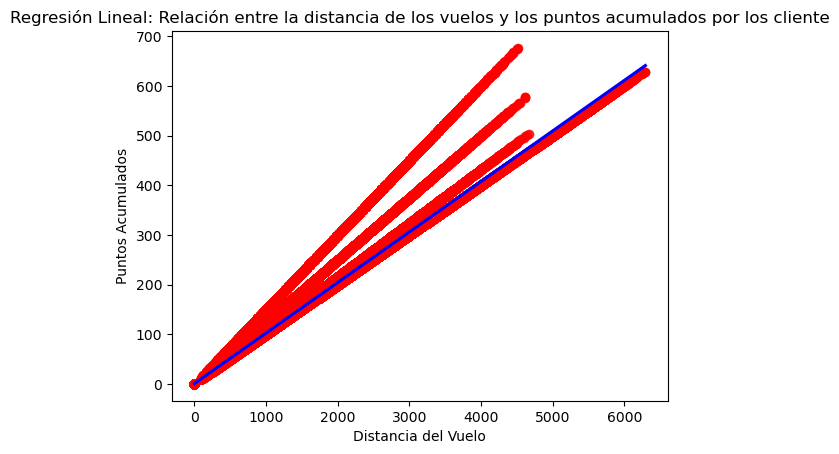

In [40]:
sns.regplot(x='Distance', y='Points Accumulated', data=df_unido, scatter_kws={'color':'red'}, line_kws={'color':'blue'})
plt.title("Regresión Lineal: Relación entre la distancia de los vuelos y los puntos acumulados por los cliente")
plt.xlabel("Distancia del Vuelo")
plt.ylabel("Puntos Acumulados")
plt.show()

Explicación: Si, exite relación; hemos analizado en esta gráfica que existe una tendencia ascendente ya que cuanto más distancia o más largo es el vuelo, más puntos acumulan los clientes. 

3) ¿Cuál es la distribución de los clientes por provincia o estado?

Text(0, 0.5, 'Provincia y/o Estado')

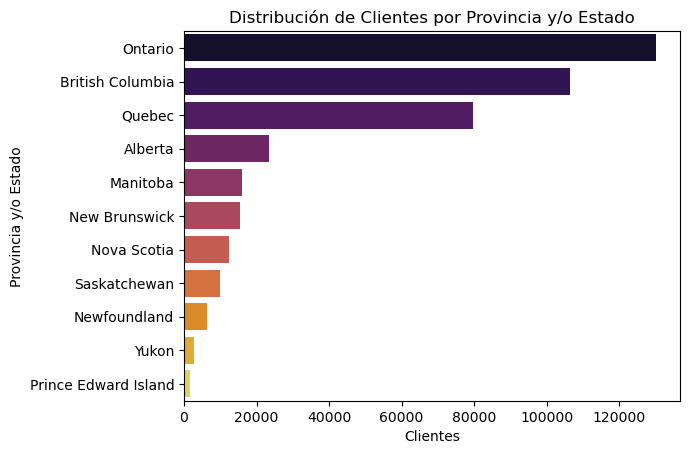

In [41]:
provincia_count = df_unido['Province'].value_counts().reset_index()
provincia_count.columns = ['Province', 'Count']
sns.barplot(y='Province', x='Count', data=provincia_count, palette='inferno')
plt.title('Distribución de Clientes por Provincia y/o Estado')
plt.xlabel('Clientes')
plt.ylabel('Provincia y/o Estado')

Explicación: Esta grafica nos da como resultado que la mayoría de clientes se encuentra en la Provincia de Ontario, percibimos que se debe a que se encuentran las principales ciudades como Toronto y Ottawa (capital) entre otras con mayor porcentaje, seguida por la provincia de British Columbia y en tercer lugar Quebec. Con estos resultados como next step podríamos realizar una estrategia de marketing para expandirnos geográficamente por las provincias donde tenemos mayor cuota de mercado. 

4) ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

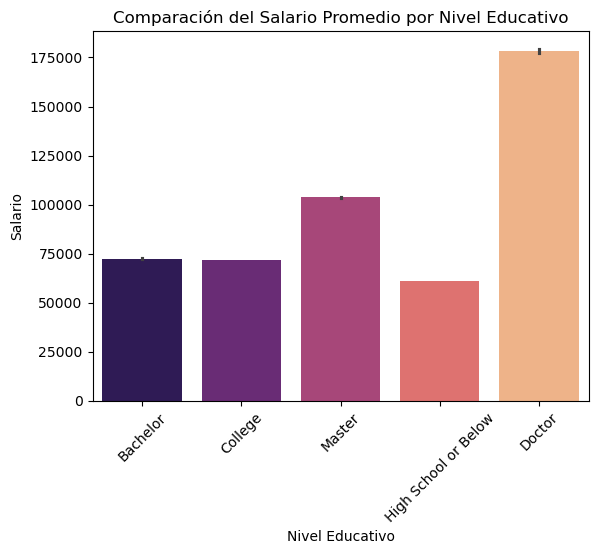

In [42]:
   
sns.barplot(data=df_unido, x="Education", y="Salary", palette= "magma")
plt.title("Comparación del Salario Promedio por Nivel Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario")
plt.xticks(rotation=45)
plt.show()

Explicación: En esta grafica podemos apreciar dos puntos muy importantes, el primero que gracias al análisis previo de los nulos en Salary ahora tenemos una gráfica completa incluyendo los salarios de los clientes que tienen nivel educativo College, en segundo lugar podemos apreciar que los que tienen mejor salario son los que tienen estudios de doctorado, con una diferencia considerable con respecto a los que tienen un grado de Master, y ubicandose en las ultimas posiciones los que tienen un nivel educativo de Bachelor, College y High School or Below. Con lo cual concluímos que a mejores estudios mejores salarios perciben.

5) ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

Text(0.5, 1.0, 'Proporción Clientes por Tipos de Tarjetas de Fidelidad')

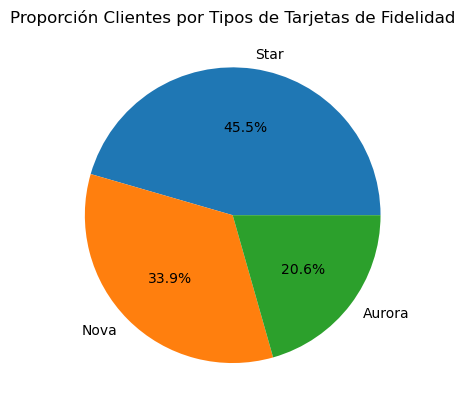

In [43]:
df_clientes_tipo_tarjetas = df_unido['Loyalty Card'].value_counts().reset_index()
df_clientes_tipo_tarjetas.columns = ['Loyalty Card', 'Proporcion']
plt.pie(df_clientes_tipo_tarjetas['Proporcion'], labels=df_clientes_tipo_tarjetas['Loyalty Card'], autopct='%1.1f%%')
plt.title('Proporción Clientes por Tipos de Tarjetas de Fidelidad')

Explicación: Esta gráfica nos da como resultado que el mayor % de clientes cuenta con una tarjeta de fidelidad tipo Star con un 45.5%, seguida por la tarjeta Nova con un 33.9%, siendo la menos usada por estos mismos la tarjeta de fidelidad Aurora solo con un 20.6%. Por lo cual recomendamos acciones de push para la tarjeta Star, y estrategias de re-branding en la tarjeta Aurora para incrementar su cuota en el mercado.

6) ¿Cómo se distribuyen los clientes según su estado civil y género?

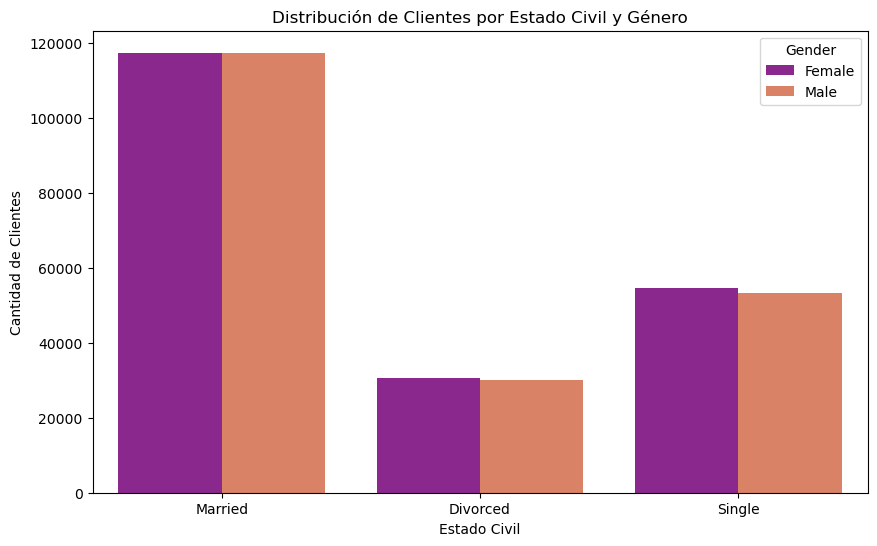

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_unido, x="Marital Status", hue="Gender", palette= "plasma")
plt.title("Distribución de Clientes por Estado Civil y Género")
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad de Clientes")
plt.show()

Explicación: Finalmente, en ésta grafica observamos que la brecha de género es practicamente nula, porque el % de hombres y mujeres en los tres estados civiles es muy similar. Además se observa que exite un mayor porcentaje de clientes casados en ambos géneros, seguido por los solteros (siendo aprox. un 50% menos que los primeros) y finalmente en un menor pocertanje los clientes divorciados. Según nuestra hipotesis el principal target de la empresa son matrimonios con o sin hijos.